In [3]:
import os
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zlib import crc32


# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [4]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [5]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
fetch_housing_data()

In [7]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()

In [9]:
housing['ocean_proximity_numeric'] = housing.ocean_proximity.replace({'NEAR BAY':3, '<1H OCEAN':1, 'INLAND':4, 'NEAR OCEAN':2, 'ISLAND':0})

/tmp/ipykernel_48760/4105644219.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing['ocean_proximity_numeric'] = housing.ocean_proximity.replace({'NEAR BAY':3, '<1H OCEAN':1, 'INLAND':4, 'NEAR OCEAN':2, 'ISLAND':0})


In [10]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_numeric'],
      dtype='object')

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_numeric
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,2.302616
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.316296
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


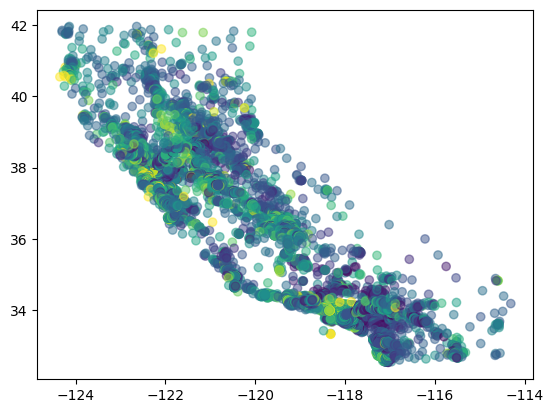

In [12]:
plt.scatter(housing.longitude, housing.latitude, c=housing.housing_median_age, alpha=0.5)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity_numeric'}>, <Axes: >,
        <Axes: >]], dtype=object)

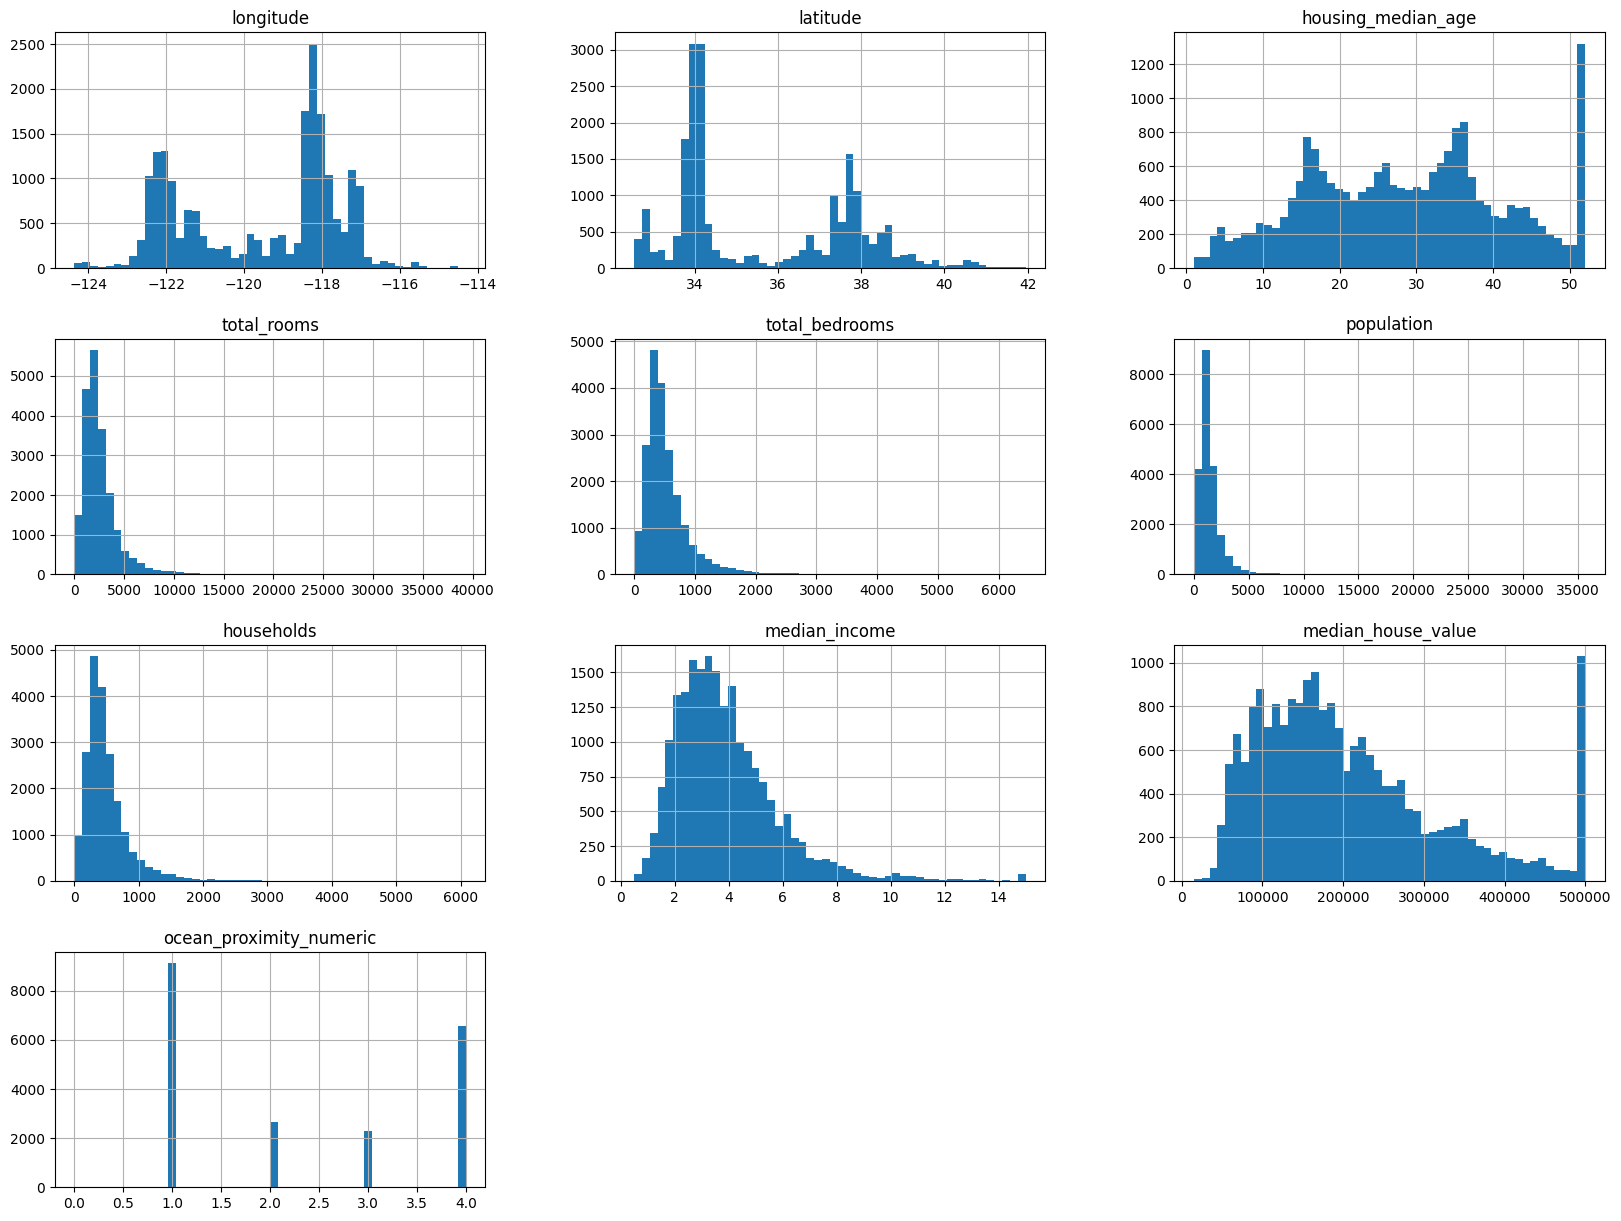

In [13]:
housing.hist(bins=50, figsize=(20,15))

In [14]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing, 0.2)

In [16]:
len(train_set)

16512

In [17]:
len(test_set)

4128

In [18]:
crc32(np.int64(1000)) & 0xffffffff < 0.2 * 2**32

True

In [19]:
crc32(b"Hello World")

1243066710

In [20]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [21]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_numeric
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,2
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,2
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,2
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,4
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,1
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,4
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,1
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,1


In [22]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

<Axes: >

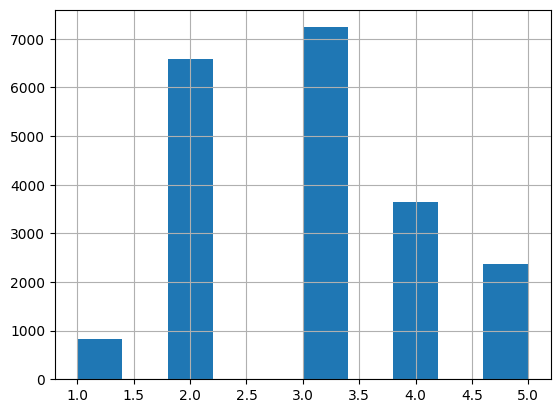

In [23]:
housing["income_cat"].hist()

In [24]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = list(split.split(housing, housing["income_cat"]))[0]
strat_train_set = housing.loc[train_index]
strat_test_set = housing.loc[test_index]

In [25]:
def income_cat_column_creator(df):
    return pd.cut(df["median_income"],
            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
            labels=[1, 2, 3, 4, 5])

In [26]:
train_set["income_cat"] = income_cat_column_creator(train_set)
test_set["income_cat"] = income_cat_column_creator(test_set)


In [27]:
concat_list = []
for df in ((train_set, "train_set"), (test_set, "test_set"), 
           (strat_train_set, "strat_train_set"), (strat_test_set, "strat_test_set"), (housing, "housing")):
    concat_list.append(pd.Series(df[0].income_cat.value_counts() / df[0].income_cat.count(), name=df[1]))

In [28]:
pd.concat(concat_list, axis=1).reset_index().sort_values("income_cat")

,income_cat,train_set,test_set,strat_train_set,strat_test_set,housing
4,1,0.039729,0.040213,0.039789,0.039971,0.039826
1,2,0.317466,0.324370,0.318859,0.318798,0.318847
0,3,0.348595,0.358527,0.350594,0.350533,0.350581
2,4,0.178537,0.167393,0.176296,0.176357,0.176308
3,5,0.115673,0.109496,0.114462,0.114341,0.114438


--------------------------------------------

# Visualizations

In [30]:
housing = train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

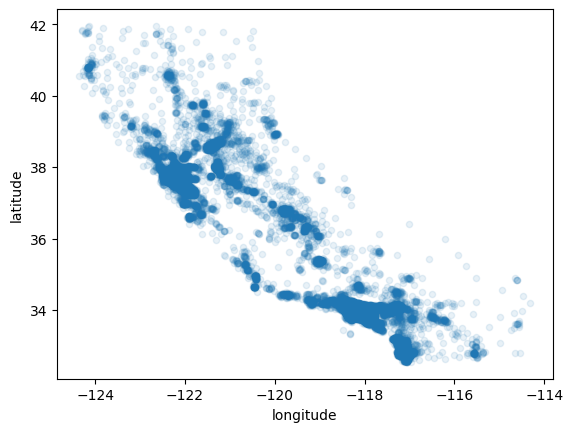

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

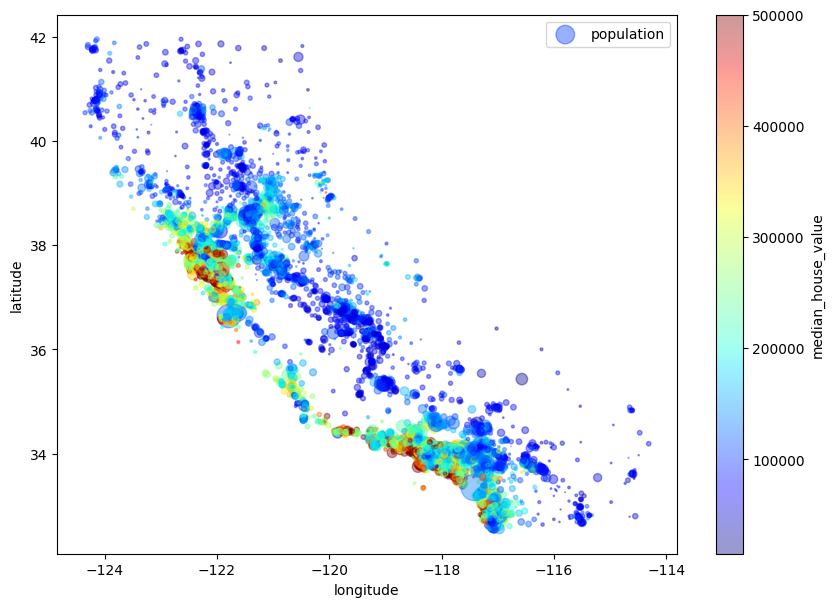

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=housing.population/100, c="median_house_value", label="population",
            figsize=(10,7), cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
